# Recap
<img src=Material/p1.jpeg width=450 align=left>
<img src=Material/p2.jpeg width=450 align=right>

### Physical variables
- Stellar Mass $M_*$,   Star formation rate $\text{SFR} = dM/dt$,
- Redshift $z$
- Metallicity $Z$
- Galaxy Age $t_\text{gal}$
- Mass of the gas $M_\text{gas}$ (new!)
- Supernovae explosion rate $\text{SN}_e$

### Observations
The star formation rate vs mass is proven to be very interesting, there seems to be two populations
<br>

<img src=plots/Mass_sfr.jpg width = 600px>

Also nebular metallicity and mass is interesting

<img src=plots/Mass_z.jpg width = 600px>

Also the specific star formation rate 

$$\dfrac{SFR}{M_*}$$

<img src=plots/specific_sfr_mass.jpg width = 600px>

In the case of the specific SFR you find that the dividing line is now horizontal, so apparently the two populations are divided by -11 which corresponds to $1/10^{11}\ \text{yrs}$

### Assumptions
- $\alpha = 1$
- Closed box model

### Model

Is there a causality between the SFR and the mass? We see it in a plot but note **Correlation doesn't imply causality**, maybe the correlation is implied by some hidden variable.
We found that the actual dependence is hidden in the Gas mass $M_\text{gas}$.

Let's make a sketch.

We found that there is a conversion of gas mass into stars and suggested the folowing relation

$$
    \text{SFR} = \epsilon\ (M_\text{gas})^\alpha 
$$

In our simplified model we assumed $\alpha = 1$

How does this happen? Due to the **Jeans criterion** which is given by the equilibrium of Gravity and Kinetic Pressure. 
The one gas that collapses if 

$$
    M_\text{gas} > M_J(T, Z, ...)
$$

The Jeans mass depends on the sound speed which itself depends on the Temperature of the gas and its metallicity.

To test this hypothesis, we can try to plot the surface density of the galaxy disk and the star formation rate for many galaxy. This test has already been done, what was found is an almost linear trend

$$
    \Sigma_\text{SFR} \propto (\Sigma_\text{gas})^\alpha \qquad \alpha \in (1, 1.5)
$$

---

Having said this you can write the following

$$
    M_*(t) = \int_{t_0}^t \text{SFR}(t') dt' = \int_{t_0}^t \epsilon M_\text{gas}(t') dt' 
$$

Now we want to understand

$$
    \dfrac{dM\text{gas}}{dt} =\ ?
$$

We need an assumption, the **closed box approximation**, for which $M_\text{gas}^\text{in} = M_\text{gas}^{\text{out}} = 0 $
And so the only process responsible is star formation

$$
    \dfrac{dM\text{gas}}{dt} = -\text{SFR}
$$
And so 

$$
    M\text{gas} = M_\text{tot} e^{-\epsilon t}
$$

Now, does the model match with the observations? We may need to add more variables, redshift, metallicity for the degeneracy or even review some assumptions that we made preemptively

we also want to find the metallicity, for example 
$$
    Z_\text{neb} = \int ...\ (M_\text{gas})^{\ ...} \ dt'
$$

Last time we were exploring that

$$
    Z_\text{neb} \propto \frac{M_\text{O}}{M_\text{gas}} \propto \frac{M_*}{M_\text{gas}} ?
$$

# Investigation 1

<img src=plots/Mass_sfr.jpg width = 500px align=right>

We decided to start by comparing the Gas Mass expression with our data, particularly we're interested in the log mass vs sfr plot.
We start from the following relations

$$
    \frac{dM_*}{dt} = \text{SFR} \quad \Longrightarrow \quad M_* = \int dt \ \text{SFR}
$$

And the ***closed box approximation***

$$
    \text{SFR} = - \frac{dM_\text{gas}}{dt} = -\epsilon M_\text{gas}(t)
$$


From which we can find 

$$
    M_\text{gas} = M_\text{gas}|_{t=0}\ e^{-\epsilon t}
$$

And then one can recast this into the stellar mass

$$
    M_* = -\int_{t_0 = 0}^{t} dt\ \epsilon M_\text{gas}\  = -\int dt\ \epsilon \ M_\text{gas}|_{t=0}\ e^{-\epsilon t}
$$
  
$$
    M_* = M_\text{gas}|_{t=0} \big( 1- e^{-\epsilon t}\big)
$$

Now the star formation rate can be calculated as the derivative of this last result, that is

<br>

$$
    \text{SFR} = M_\text{gas}|_{t=0} \ \epsilon \ e^{-\epsilon t} = \dfrac{M_*}{1- e^{-\epsilon t}} \epsilon \ e^{-\epsilon t }
$$
<br>

From which we find

$$
    \text{SFR}(M_*)= M_*\ \dfrac{\epsilon}{e^{\epsilon t} - 1}
$$

### Conclusions

$t$ here is the *age of the galaxies*. By looking at the plot we immediately find that for this to be exact we espect a linear relation

$$
    \log{\text{SFR}} \propto \log{M_*}
$$

This means we should have *no mass dependence on the age of galaxies*, more over they should all have **the same age**, which age would that be?

We can calculate it.

### Fetching and filtering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.io import fits

In [2]:
data_= fits.open('catalogs/matched.fits')
data_[1].data

FITS_rec([( 299489676975171584, 146.71420288, -1.04130435, 0.02127545, 10.29470062, -5.20650327e-01, -9999., 0, 1,  299489676975171584, 4.6211758e+02, 10.688581 , 98.78678  , 6.727546 , 72.29009   , 6.938117 , 205.90462 , 8.761121 ,  299489676975171584, 146.71421, -1.0413043 , 0.02127545, 10.18000031, 0.,  4.  , 'composite'),
          ( 299489951853078528, 146.91944885, -0.99049175, 0.21392463, 11.16201782, -3.49721670e-01, -9999., 0, 1,  299489951853078528, 1.5469431e+01,  6.547065 ,  8.996722 , 3.6223369,  0.20092708, 2.917477 ,  23.569141, 6.1320004,  299489951853078528, 146.91945, -0.99049175, 0.21392463, 11.09000015, 0.,  3.  , 'composite'),
          ( 299490501608892416, 146.85983276, -0.80890167, 0.12655362, 11.37362385, -1.12491751e+00, -9999., 0, 1,  299490501608892416, 1.8467436e+01,  7.4497437,  6.5413513, 5.414522 , 19.528574  , 4.65369  ,  11.638905, 4.7927322,  299490501608892416, 146.85983, -0.80890165, 0.12655362, 11.14000034, 0., 12.  , 'composite'),
          ...,
 

In [3]:
SFR = data_[1].data['Log_SFR_Msun_yr']
mass = data_[1].data['Log_stellar_mass_Msun_1']
Z_neb = data_[1].data['Metallicity_nebular']

In [4]:
Z_neb_1 = Z_neb[Z_neb > -99]
mass_1 = mass[mass > -99]
SFR_1 = SFR[SFR > -99]
print(Z_neb)
print(mass_1)
print(SFR_1)

[-9999. -9999. -9999. ... -9999. -9999. -9999.]
[10.29470062 11.16201782 11.37362385 ... 10.94297028 10.75484371
 10.98335648]
[-0.52065033 -0.34972167 -1.12491751 ...  0.19182718 -2.05821419
 -0.83074206]


In [5]:
mask = np.logical_and(SFR>-99, mass>-99)
mass_SFR = np.vstack([mass[mask], SFR[mask]])

print(mass_SFR)
print(mass_SFR.shape)

[[10.29470062 11.16201782 11.37362385 ... 10.23716545  9.20087433
   9.95433998]
 [-0.52065033 -0.34972167 -1.12491751 ...  0.19182718 -2.05821419
  -0.83074206]]
(2, 786907)


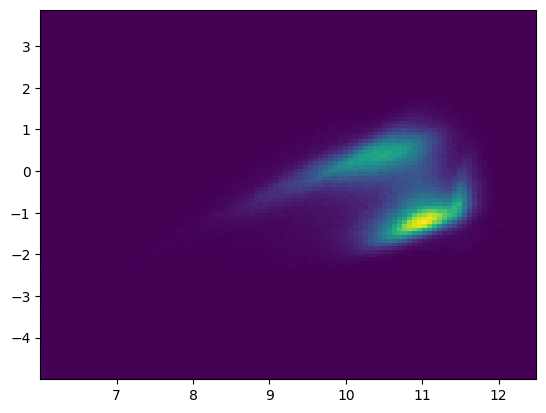

In [6]:
plt.hist2d(mass_SFR[0, :], mass_SFR[1, :], bins = 100, cmap = 'viridis');

### Calculating the time
Notice that the epsilon is given by the paper ok Kennycutt et al. and it points to a value of

$$
    \epsilon = 0.25 \ \text{Gyr}^{-1}
$$

Which means we have to recast the star formation rate dimensionality onto Gyrs. Keep in mind that epsilon is the adimensionality constant that comes out of the ODE.

If i call $R$ the specific star formation rate (that is the ratio of SFR and the stellar mass) i have that

$$
    t = \epsilon^{-1} \ln\big({1 + \dfrac{\epsilon}{r}}\big)
$$

In [7]:
eps = .25*10**(-9)
r = (10**(mass_SFR[1, :])/10**(mass_SFR[0, :]))
t = 1/eps *np.log(1 + eps/r)
t /= 10**(9)

print(f'{t} Gyr')

[11.41240156 17.63774459 26.68265269 ...  5.31370508 15.34895156
 11.15022986] Gyr


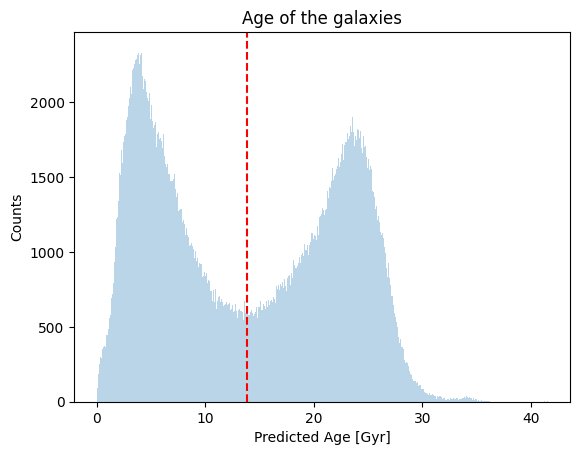

In [8]:
#plt.figure(figsize = (12,3))
plt.hist(t, bins = 1000, alpha = .3)
#plt.xlim(500,1200)
plt.title('Age of the galaxies')
plt.ylabel('Counts')
plt.xlabel('Predicted Age [Gyr]')
plt.axvline(13.8, ls='--', color='r')

In [9]:
print(np.min(t)) #only 100 years?

6.595209771941981e-07


With this model i'm able to explain only the first population, not the second.

**The closed box approximation doesn't quite work**

## Lecture recap (16/05)

### Observations (so far)

Let's review the specific SFR plot, here we can identify two populations (just like the SFR/mass) let's call them
- Main sequence (there are more galaxies)
- Red sequence

The two regions are split at the value of $\text{SFR}/M_* = 10^{-11}$, also we can see the Red branch starts at $M_* \sim 10^{10.5}$.

<img src=plots/specific_sfr_mass.jpg width = 500px>

<br>

The metallicity is given by $Z = 12 + \log(\text{O/H})$, the 12 is given because we don't like a negative metallicity.

<img src=plots/Mass_z.jpg width = 460px>


There two plots are given at redshift $z \approx 0$

Also we can plot the SFR vs the redshift and we see some linear trend, **the SFR appears to be increasing with redshift**

### Model

We already saw that 

$$
    \text{SFR}(t) = \epsilon M_\text{gas}^\alpha (t)
$$

And from this

$$
    M_* (t) = \int_{t_0}^{t} \text{SFR} (t')\ dt'
$$

Now we made some very important assumptions! It's time to review them

### Assumptions (to verify)
- Closed box model $(\dot{M}_\text{gas}^{in} = 0, \dot{M}_\text{gas}^{out} = 0)$
- $\alpha = 1$
- $\epsilon = \text{const.}$

### Predictions 
$$
    M_\text{gas} = M_\text{gas}|_{t=0}\ e^{-\epsilon t}
$$

$$
    M_* = M_\text{gas}|_{t=0} \big( 1- e^{-\epsilon t}\big)
$$

$$
    \text{SFR}(M_*)= M_*\ \dfrac{\epsilon}{e^{\epsilon t} - 1}
$$

### Is this model consistent with the data?
Let's split this in two parts.

**For the MS population**: this is constant if $\epsilon$ is constant with respect to the stellar mass and also if $(t-t_0)$, the age of the galaxies, is constant.

$$
    \dfrac{d\epsilon}{dM_*} = 0 \qquad \qquad \dfrac{dt_\text{age}}{dM_*} = 0
$$

Can we check if $\epsilon$ is constant with mass? Kennycut did this, and by observing a bunch of galaxies and he found

<img src=Material/kennycut.png width = 600px>

Which normalized in a different way gives

$$
    \Sigma_\text{SFR} = 0.25\ \bigg(\frac{\Sigma_\text{SFR}}{1M_\odot \text{pc}^{-2}}\bigg)^{1.4}\ M_\odot\ \text{Gyr}^{-1} \text{pc}^{-2}
$$

And so $\epsilon = 0.25\ \text{Gyr}^{-1}$

Kennycutt tried also to divide by time introducing the dynamical time, given by

$$
    \tau_\text{dyn} \propto \tau_\text{ff} \propto \rho^{-1/2}
$$

And now you get a linear relation, you don't have the 1.4 at the exponent anymore

$$
    \Sigma_\text{SFR} = 0.017 \ \bigg(\frac{\Sigma_\text{gas}}{1 M_\odot \text{pc}^{-2}} \bigg) \ \bigg[\frac{\tau_\text{dyn}}{\text{yr}} \bigg]^{-1} M_\odot \ \text{kpc}^{-2}
$$

So now one can define

$$
\epsilon = \frac{\epsilon '}{\tau_\text{dyn}}
$$

And here you say that $\epsilon '$ is constant with mass and time, so that ***proves our first assumption*** (if all galaxies have the same dynamical time and they are at the same redshift than also $\epsilon$ is constant)

We should also prove that all galaxies have the same age but there is no way to prove this right now so we have to take this for granted. Still this proves that ***we can't rule out this model for MS population***

**For the red population?** So how can we explain the transition at $\log(M_*) > 10.5$? We can't find any physical mechanism that causes this sudden jump, maybe we should use different observables. Let's go into the metallicity.

### Metallicity

Let's compute the following fraction

$$
    f_\text{gas} = \frac{M_\text{gas} (t)}{M_\text{gas}(t) + M_*(t)} =\ e^{-\epsilon\ (t-t_0)}
$$

But how about the galaxies have different initial masses? This could be one way, let's check the metallicity observations.

Now we define the following quantity analogue to the metallicity

$$
    \frac{M_Z}{M_\text{gas}} = Z = \frac{\text{O}}{\text{H}}\quad \Longrightarrow \quad \frac{d M_Z}{dt} = ?
$$

We imagine that what guides the metals formation is the SFR and the supernovae explosion rate, to first order

$$
    \frac{d M_Z}{dt} \propto \text{SFR}
$$

Actually we need the precise relation, we define $\text{y}$ as the **metal yield**, and also we can see that a part of the metallicity goes into new stars

$$
    \frac{d M_Z}{dt} = \text{y}\ \text{SFR} - Z \ \text{SFR}  
$$

$$
    \frac{d M_Z}{dt} = \text{y}\ \text{SFR} - \frac{M_Z}{M_\text{gas}} \ \text{SFR} 
$$

This maybe should also be considered into the integral for when we calculate $M_*$ but metals really don't matter too much in the total mass of the stars, while they matter in the metallicity definition, of course.

Now we need to solve the following differential equation

$$
    \frac{d M_Z}{dt} + M_Z\ \epsilon = \text{y} \ \text{SFR}
$$

Which has the solution

$$
    M_Z(t) = e^{-A(t)}\cdot \int_{t_0}^{t} \text{y}\ \text{SFR}(t')\ e^{A(t')}\ dt' \quad \text{with} \quad A(t) = \int_{t_0}^{t} \epsilon\ dt = \epsilon\ (t-t_0)
$$

Assuming $\epsilon$ is constant with time, which is not really true. The final solution is

$$
    M_Z (t) = \text{y}\ M_\text{gas}(t_0)\ \epsilon \ (t-t_0) \ e^{-\epsilon\ (t-t_0)}
$$

So finally

$$
    Z(t) = \frac{M_Z(t)}{M_\text{gas}(t)} = \text{y}\cdot \epsilon\ (t-t_0)
$$

The metallicity **increases linearly with time**, but this linear relation still doesn't explain the sudden change in the two population.
Now it's time to **open the box!!**

### Checking the metallicity function
Our data gives us the following quantity

$$
    \tilde{Z} = 12 + \log\bigg(\frac{\text{O}}{\text{H}}\bigg)
$$

this is observed


$$
    Z(t) = \frac{M_Z(t)}{M_\text{gas}(t)} = \text{y}\cdot \epsilon\ (t-t_0)
$$

from here we need $Z(M_*)$ and then we compare the dataset with our prediction, from the definition of $M_*$ we find

$$
    Z(t) = \text{y}\ \log \bigg(\frac{1}{1 - M_*/M_0}\bigg)
$$

In [10]:
mask = np.logical_and(Z_neb>-99, mass>-99)
mass_Z = np.vstack([mass[mask], Z_neb[mask]])

print(mass_Z)
print(mass_Z.shape)

[[10.13985348  9.36403275 10.67859554 ... 10.23716545  9.20087433
   9.95433998]
 [ 9.01215935  8.77109718  9.11853504 ...  9.11162853  8.42778969
   8.83598423]]
(2, 198822)


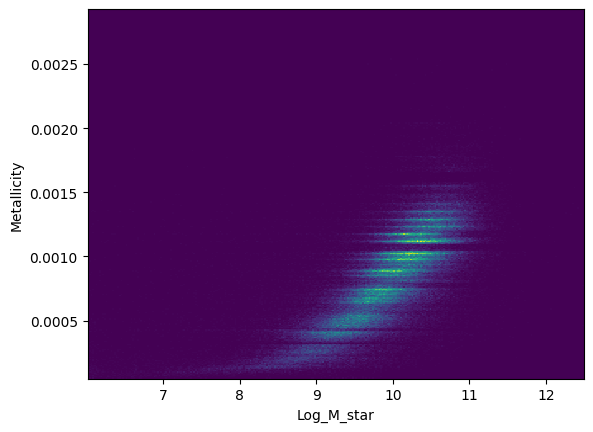

In [11]:
Z_n = 10**(mass_Z[1, :]- 12)

plt.hist2d(mass_Z[0, :], Z_n, bins = 300)
plt.ylabel('Metallicity')
plt.xlabel('Log_M_star');

/tmp/ipykernel_33481/611751389.py:4: RuntimeWarning: invalid value encountered in log
  Z_pred = y * np.log(1/(1-x/M_0))


nan


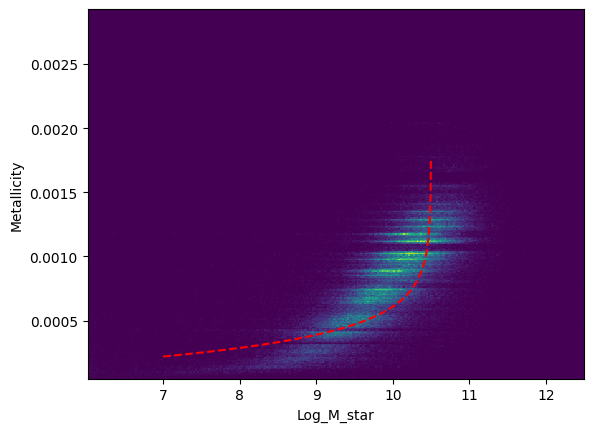

In [73]:
y = .0002
M_0 = 10.5
x = np.linspace(7,12, 1000)
Z_pred = y * np.log(1/(1-x/M_0))
print(Z_pred[-1])

plt.hist2d(mass_Z[0, :], Z_n, bins = 300)
plt.plot(x, Z_pred, c='r', ls='--')
plt.ylabel('Metallicity')
plt.xlabel('Log_M_star');

### Reviewing assumptions: Leaky box assumption
Now the galaxy can communicate with the external universe, you have the galaxy, then something, then the IGM. Let's say this something in between is:
- Assumption: A **virialized dark matter halo + some gas** sourround the galaxies
From this galaxy to the dark matter halo now you can have inflow and outflow of the gas mass.

So now we have a new bigger structure, which is inside the IGM gas, a non virialized structure, and now you have an outflow and inflow of this virialized mass

In short
$$
    \dot{M}_\text{gas}^{in} \neq 0 \qquad \dot{M}_\text{gas}^{out} \neq 0
$$

And 
$$
    \dot{M}_\text{vir}^{in} \neq 0 \qquad \dot{M}_\text{vir}^{out} \neq 0 
$$

We need now to build a new model.

$$
    \frac{d M_\text{gas}}{dt} = \dot{M}_\text{gas}^{in} - \dot{M}_\text{gas}^{out} - \epsilon\ M_\text{gas}(t)
$$

### Questions
What is $\dot{M}_\text{vir}^{in}$? Which physical processes determine this change?

What is $\dot{M}_\text{gas}^{out}$? Which physical processes determine this change?

If i understand this i can maybe recast the differential equation in some way.

---

# Opening the box

We define this new regime using a differential equation

$$
    \frac{d M_\text{gas}}{dt} = \dot{M}_\text{gas}^{in}(t) - \dot{M}_\text{gas}^{out}(t) - \text{SFR}(t)
$$

Our job is to identify these variables.

Which processes are related to the ejected matter part?

- We thought of ***AGNs*** which push gas outwards, this may depend on a few things, such as accretion rate. The relevant variable is for sure the black hole mass $M_\text{BH}$, from which you can develop a model by scanning the literature.

- Supernovae ejection, each supernova produces an energy of $10^{51}$ ergs. You want a rate of supernovae energy production, we will take only the type 2 supernovae. If so then you find that this rate is proportional to the $\text{SFR}$, this means

$$
    \dot{M}_\text{gas}^{out}[\text{SNII}] \propto \eta\ \text{SFR}
$$

With $\eta$ as the feedback rate of supernovae explosion, and the same you can do with AGNs and so on... Another one is the run pressure stripping (Gun and Gott) process

$$
    \dot{M}_\text{gas}^{out}[\text{SNII}] \propto \eta\ \text{SFR} \\
    \dot{M}_\text{gas}^{out}[\text{AGN}] \propto \ ... \\
    \dot{M}_\text{gas}^{out}[\text{RPS}] \propto \ ... \\
$$

you can add more feedbacks, we will pick the supernovae only.

With this i get the following differential equation

$$
    \frac{d M_\text{gas}}{dt} = \dot{M}_\text{gas}^{in}(t) - [\ 1 + \eta \ ]\  \text{SFR}(t)
$$

Now we don't know what $\eta$ depends on. Now what about $\dot{M}_\text{gas}^{in}$?

There are many possibilities: dark matter accretion, galaxy mergers, gas recycling etc.

$$
    \dot{M}_\text{gas}^{in}[\text{DM}] \propto \eta\ \text{SFR} \\
    \dot{M}_\text{gas}^{in}[\text{merger}] \propto \ ... \\
    \dot{M}_\text{gas}^{in}[\text{recycling}] \propto \ ... \\
$$

Now we can pluck all of this in and solve the differential equation numerically or look at the dominant term and solve that.

Let's not forget where we started from. The data. If you look at the first plot (specific SFR - mass) you can see that if you focus on one population there is no dependence on mass.

- SFR/M* is constant with stellar mass M*, i can impose this on my differential equation$\ \Longrightarrow\ \text{SFR} = \dfrac{1}{1 + \eta} \ \left(\dot{M}_\text{gas}^{in}(t) - \dfrac{d M_\text{gas}}{dt} \right)$

Of course the SFR must be positive, so we have another constraint. Now there are two ways to approach this:

### 1) Gas reservoir system

We can assume that the system is a gas reservoir in equilibrium $\dfrac{d M_\text{gas}}{dt} = 0$, for intuition purposes. If so then

$$
    \dfrac{\dot{M}_\text{gas}^{in}(t)}{M_*\ (1 + \eta) } = \text{const with } M_*
$$

Now $\dot{M}_\text{gas}^{in}(t) \propto \dot{M}_\text{vir}^{in}(t)\ \xi$ so a fraction of the gas coming in the virial mass gets accreted in the galaxy, if so, considering redshift we have

$$
    \dot{M}_\text{gas}^{in}(t) \propto \xi \ M_\text{vir} \ A(1+z)^{3/2}
$$

where A will be a proportionality constant for dimensionality purposes. Now unfortunately **this model is too simple!** we need to consider the fact that the universe is expanding and that dark matter doesn't accrete like a perfect sphere.

Somebody checked this (McBride et al. (2009)) and found 

$$
    <\dot{M}_\text{vir}>\ = \ 42 \dfrac{M_\odot}{\text{yr}} \cdot \left[ \dfrac{M_\text{vir}}{10^{12} M_\odot} \right]^{1.127} (1+1.17z)\cdot \sqrt{\Omega_m (1+z)^3 + \Omega_\Lambda}
$$

Now how do we determine $\xi$? We compare two timescales, the cooling time and the free fall time. In order for the gas to accrete it needs to be able to cool while falling, meaning $\tau_\text{cool} < \tau_\text{ff}$, so this term will depend on the virial mass.

If we simplify enough we can say

$$
    \xi(M_\text{vir}) = 1 \qquad \text{if} \quad 10^9 < \dfrac{M_\text{vir}}{M_\odot} < 10^{12}
$$

and 0 otherwise.

Now we have  

$$
    \dfrac{\dot{M}_\text{gas}^{in}(t)}{M_*\ (1 + \eta) } = \text{const with } M_*
$$

how do i check this? I could do it by integrating the star formation rate, or i could look at an empirical relation (see Moster et al. (2009)), which yields the following relation

$$
    \dfrac{M_*}{M_\text{vir}} \propto \left[ \left(\dfrac{M_\text{vir}}{M_1}\right)^{-\beta} + \left(\dfrac{M_\text{vir}}{M_1}\right)^{\gamma} \right]^{-1}
$$

with $M_1 \sim 10^{12}M_\odot$, $\beta \sim 1$, $\gamma \sim 0.6$, for $M_\text{vir} << 10^{12}M_\odot$ you get that 

$$
    \dfrac{M_*}{M_\text{vir}} \propto M_\text{vir}
$$

but this is a problem!!

$$
    \dfrac{\dot{M}_\text{gas}^{in}(t)}{M_*\ (1 + \eta) } = \text{const with } M_*\ \text{only if } \eta \propto M_\text{vir}^{-1}
$$

This is saying that the feedback is more efficient for small galaxies. When you then cross the $10^{12} M_\odot$ you need to add other processes in order to mantain this.

### 2) If non equilibrium, in which case is the SFR constant with $M_*$?

----

## Our investigation
We're interested in the consequence of the metallicity vs stellar mass graph when we use the open box model. First of all the assumptions
- Metals homogeneously distributed in the galaxy
- Only cause of ejecta is SN activity
- We consider only the type 2 supernovae

We start from the following relation 

$$
    \frac{d M_\text{gas}}{dt} = \dot{M}_\text{gas}^{in}(t) - \dot{M}_\text{gas}^{out}(t) - \text{SFR}(t)
$$

In the closed box we arrived at the following relation for the metallicity

$$
    \frac{d M_Z}{dt} = \text{y}\ \text{SFR} - Z \ \text{SFR}  
$$

Now, how do the added contributes affect the overall metallicity? 

$$
    \dot{M}_\text{gas}^{out}(t) \propto \eta\ \text{SNR}
$$

The amount of gas ejected by supernovae feedback is metal enriched gas, but at the same time due to homogeneous distribution of metals, this will not change the overall nebular metallicity in my galaxy.

$$
    \dot{M}_\text{gas}^{in}(t) \propto \xi \ M_\text{vir} \ A(1+z)^{3/2}
$$

This has an effect, in fact from the definition of $\xi$ and remembering that there about two orders of magnitude if not three between the virial mass and the galaxy mass, we know that $\xi$ says that only ***low mass galaxies can accrete IGM gas from the exterior***, since the IGM gas is presteen gas (meaning with low metallicity if not none) we can say that we expect low mass galaxies to have lower metallicity than what's predicted by the closed box model.

Meanwhile, since there is no inflow of matter and the outflow doesn't change the metallicity, we can safely say that ***high mass galaxies are well represented by the closed box model***.

This goes to show that our fit wasn't so bad but at around $M < 10^{10.5} M_\odot$ we should switch to the open box model, considering the inflow of presteen gas.


### Assuming $Z_\text{igm} = 0$
We expect the model to be roughly the same ($\dot{M}^{in}_\text{Z} = 0$ because presteen gas) but the overall $M_\text{gas}$ should have changed and so must be calculated using

$$
    \frac{d M_\text{gas}}{dt} = \dot{M}_\text{gas}^{in}(t) - \dot{M}_\text{gas}^{out}(t) - \text{SFR}(t)
$$

and then substituting the new found $M_\text{gas}$ as $M_Z$ in 

$$
    \frac{d M_Z}{dt} = \text{y}\ \text{SFR} - Z \ \text{SFR}  
$$

If instead you don't buy the $Z_\text{igm} = 0$ assumption then you need to add that into the $M_Z$ relation as follows

$$
    \frac{d M_Z}{dt} = \left[\text{y} + Z \right] \ \text{SFR} + Z_\text{igm}\dot{M}^{in}_\text{gas}  
$$

We know that presteen gas will not cause any change in the metals mass. So the only component remaining is the outflow

$$
    \frac{d M_Z}{dt} = \left[\text{y} + Z \right] \ \text{SFR} + Z_\text{igm}\dot{M}^{in}_\text{gas} + \dot{M}_z^{out} \\
    \frac{d M_Z}{dt} = \left[\text{y} + Z \right] \ \text{SFR} + \dot{M}_z^{out}
$$

Maybe $\dot{M}_Z^{out} = Z \dot{M}_{gas}^{out} = - Z\ \eta\ \text{SFR}$ this will be an assumption

In [148]:
def fit(M, eps = .25*10**(-9), y = .00045):
    
    Z_pred = np.array([])
    mask = M<10
    #M_gas = 13*np.ones(len(M)) calculate actual mgas
    
    #low mass
    #z1 = (1+eta)*(1+M[mask]/10.5)**(-eta/eps) * y * np.log(1/(1-M[mask]/10.5))
    A = 0
    B = 1
    eta = A + B*M[mask]**(-1/3)
    z_1 = y/(1+eta)
    Z_pred = np.append(Z_pred, z1)
    
    #high mass
    z2 = y * np.log(1/(1-M[~mask]/10.5))
    Z_pred = np.append(Z_pred, z2)
        
    return Z_pred

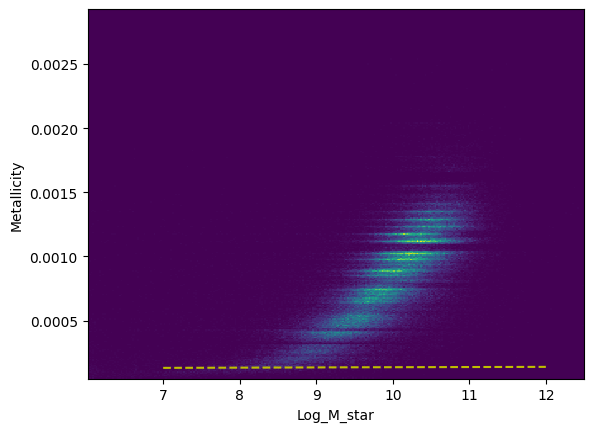

In [179]:
x = np.linspace(7,12, 1000)

plt.hist2d(mass_Z[0, :], Z_n, bins = 300)

#plt.plot(x, fit(x, y=.0002, eta=2e-10), c='r')

A = 0
B = 1
eta = A + B*M**(-1/3)
z_1 = y/(1+eta)
Z_pred = z_1
    

plt.hist2d(mass_Z[0, :], Z_n, bins = 300)
plt.plot(x, Z_pred, c='y', ls='--')


plt.ylabel('Metallicity')
plt.xlabel('Log_M_star');